<a href="https://colab.research.google.com/github/ksshu/Machine_learning/blob/main/Copy_of_gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#! ls /content/drive/MyDrive/denoise/gan/deep-sesr/deep-sesr
! ls /content/drive/MyDrive/Datasets/deep-sesr/

 test_p0_.jpg	  test_p239_.jpg        test_p381_.jpg	 test_p514_.jpg
 test_p100_.jpg   test_p23_.jpg         test_p382_.jpg	 test_p515_.jpg
 test_p101_.jpg   test_p240_.jpg        test_p383_.jpg	 test_p516_.jpg
 test_p102_.jpg   test_p241_.jpg        test_p384_.jpg	 test_p517_.jpg
 test_p104_.jpg   test_p242_.jpg        test_p385_.jpg	 test_p518_.jpg
 test_p105_.jpg   test_p243_.jpg        test_p386_.jpg	 test_p519_.jpg
 test_p106_.jpg   test_p244_.jpg        test_p387_.jpg	 test_p51_.jpg
 test_p107_.jpg   test_p245_.jpg        test_p388_.jpg	 test_p520_.jpg
 test_p109_.jpg   test_p246_.jpg        test_p389_.jpg	 test_p521_.jpg
 test_p110_.jpg   test_p247_.jpg        test_p38_.jpg	 test_p522_.jpg
 test_p112_.jpg   test_p248_.jpg        test_p390_.jpg	 test_p523_.jpg
 test_p113_.jpg   test_p249_.jpg        test_p393_.jpg	 test_p524_.jpg
 test_p114_.jpg   test_p24_.jpg         test_p394_.jpg	 test_p525_.jpg
 test_p115_.jpg   test_p250_.jpg        test_p395_.jpg	 test_p526_.jpg
 test_p116

In [ ]:
IMAGE_DATA_PATH="/content/drive/MyDrive/Datasets/deep-sesr"

In [ ]:
#!mkdir /content/drive/MyDrive/denoise/gan/deep-sesr/reshaped_images

In [ ]:
#NEW_DATA_PATH = "/content/drive/MyDrive/denoise/gan/deep-sesr/reshaped_images"
NEW_DATA_PATH = "/content/drive/MyDrive/Datasets/deep-sesr"
MODEL_SAVE_PATH = "/content/drive/MyDrive/denoise/gan/models"
EPOCH_END_SAVE = "/content/drive/MyDrive/denoise/outputs"

In [ ]:
## Reshaping the iages
"""import os
import cv2

for i in os.listdir(IMAGE_DATA_PATH):
  img = cv2.imread(IMAGE_DATA_PATH+"/"+i, cv2.IMREAD_UNCHANGED)
  img2 = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
  cv2.imwrite(NEW_DATA_PATH+"/"+i, img2)
  print("Y", end=" ")"""

'import os\nimport cv2\n\nfor i in os.listdir(IMAGE_DATA_PATH):\n  img = cv2.imread(IMAGE_DATA_PATH+"/"+i, cv2.IMREAD_UNCHANGED)\n  img2 = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)\n  cv2.imwrite(NEW_DATA_PATH+"/"+i, img2)\n  print("Y", end=" ")'

In [ ]:
import cv2

img = cv2.imread(NEW_DATA_PATH+"/test_p238_.jpg")
img.shape

(256, 256, 3)

In [ ]:
from tensorflow import keras
dataset = keras.utils.image_dataset_from_directory(
    IMAGE_DATA_PATH,
    label_mode=None,
    image_size=(256, 256),
    batch_size=1,
    smart_resize=True)

Found 516 files belonging to 1 classes.


In [ ]:
dataset = dataset.map(lambda x: x / 255.)

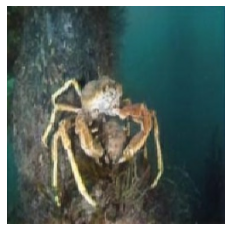

In [ ]:
import matplotlib.pyplot as plt
for x in dataset:
    plt.axis("off")
    plt.imshow((x.numpy() * 255).astype("int32")[0])
    break

**THE DISCRIMINATOR**

In [ ]:
"""from tensorflow.keras import layers

discriminator = keras.Sequential(
    [
        keras.Input(shape=(64, 64, 3)),
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)

discriminator.summary()"""

'from tensorflow.keras import layers\n\ndiscriminator = keras.Sequential(\n    [\n        keras.Input(shape=(64, 64, 3)),\n        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),\n        layers.LeakyReLU(alpha=0.2),\n        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),\n        layers.LeakyReLU(alpha=0.2),\n        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),\n        layers.LeakyReLU(alpha=0.2),\n        layers.Flatten(),\n        layers.Dropout(0.2),\n        layers.Dense(1, activation="sigmoid"),\n    ],\n    name="discriminator",\n)\n\ndiscriminator.summary()'

In [ ]:
from tensorflow.keras import layers

discriminator = keras.Sequential(
    [
        keras.Input(shape=(256, 256, 3)),
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)

discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      3136      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128, 128, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       131200    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       262272    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32, 32, 128)       0         
                                                                 
 flatten (Flatten)           (None, 131072)          

In [ ]:
"""latent_dim = 128

generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        layers.Dense(8 * 8 * 128),
        layers.Reshape((8, 8, 128)),
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(3, kernel_size=5, padding="same", activation="sigmoid"),
    ],
    name="generator",
)
"""

'latent_dim = 128\n\ngenerator = keras.Sequential(\n    [\n        keras.Input(shape=(latent_dim,)),\n        layers.Dense(8 * 8 * 128),\n        layers.Reshape((8, 8, 128)),\n        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),\n        layers.LeakyReLU(alpha=0.2),\n        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),\n        layers.LeakyReLU(alpha=0.2),\n        layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"),\n        layers.LeakyReLU(alpha=0.2),\n        layers.Conv2D(3, kernel_size=5, padding="same", activation="sigmoid"),\n    ],\n    name="generator",\n)\n'

In [ ]:
latent_dim = 512

generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        layers.Dense(32 * 32 * 512),
        layers.Reshape((32, 32, 512)),
        layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(1024, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(2048, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(3, kernel_size=5, padding="same", activation="sigmoid"),
    ],
    name="generator",
)


In [ ]:
generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 524288)            268959744 
                                                                 
 reshape (Reshape)           (None, 32, 32, 512)       0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 64, 64, 512)      4194816   
 nspose)                                                         
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 64, 64, 512)       0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 128, 128, 1024)   8389632   
 ranspose)                                                       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 128, 128, 1024)    0 

In [ ]:
import tensorflow as tf
class GAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super().__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = tf.random.normal(
            shape=(batch_size, self.latent_dim))
        generated_images = self.generator(random_latent_vectors)
        combined_images = tf.concat([generated_images, real_images], axis=0)
        labels = tf.concat(
            [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))],
            axis=0
        )
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        random_latent_vectors = tf.random.normal(
            shape=(batch_size, self.latent_dim))

        misleading_labels = tf.zeros((batch_size, 1))

        with tf.GradientTape() as tape:
            predictions = self.discriminator(
                self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(
            zip(grads, self.generator.trainable_weights))

        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {"d_loss": self.d_loss_metric.result(),
                "g_loss": self.g_loss_metric.result()}

In [ ]:
class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=1, latent_dim=512):
      self.num_img = num_img
      self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
      
      if epoch%2 == 0:
        self.model.save(MODEL_SAVE_PATH+"/gan_model_{}.hd5".format(epoch))

      random_latent_vectors = tf.random.normal(shape=(self.num_img, self.latent_dim))
      generated_images = self.model.generator(random_latent_vectors)
      generated_images *= 255
      generated_images.numpy()
      for i in range(self.num_img):
          img = keras.utils.array_to_img(generated_images[i])
          img.save(f"{EPOCH_END_SAVE}/generated_img_{epoch:03d}_{i}.png")

In [ ]:
class CustomSaver(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if epoch%2 == 0:  # or save after some epoch, each k-th epoch etc.
            self.model.save(MODEL_SAVE_PATH+"gan_model_{}.hd5".format(epoch))

In [ ]:
class CustomSaver(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if epoch%2:  # or save after some epoch, each k-th epoch etc.
            self.model.save(MODEL_SAVE_PATH+"gan_model_{}.h5".format(epoch))

In [ ]:
epochs = 1000

gan = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss_fn=keras.losses.BinaryCrossentropy(),
)

gan.fit(
    dataset, epochs=epochs, callbacks=[GANMonitor(num_img=1, latent_dim=latent_dim)]
)

Epoch 1/1000
516/516 [==============================] - ETA: 0s - d_loss: 0.6634 - g_loss: 1.6480 WARNING:tensorflow:Skipping full serialization of Keras layer <__main__.GAN object at 0x7faf48bcb510>, because it is not built.


ValueError: ignored

In [ ]:
## code to save the model
generator.save(MODEL_SAVE_PATH+"/genrator_model_v_final.h5")

In [ ]:
#discriminator.save(MODEL_SAVE_PATH+"/descriminator_v1.h5")

In [ ]:
#gan.save(MODEL_SAVE_PATH+"/gan_v1.h5")

In [ ]:
## load the model
gen_model = keras.models.load_model(MODEL_SAVE_PATH+"/genrator_model_v1.h5")

In [ ]:
random_latent_vectors = tf.random.normal(
            shape=(10, latent_dim))

In [ ]:
imgs = gen_model.predict(random_latent_vectors)

In [ ]:
## to save the images
import cv2
IMAGE_SAVE_PATH = "/content/drive/MyDrive/denoise/gan/pred_images/"
count = 1
for i in imgs:
  img = (i*255).astype("uint8")
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  cv2.imwrite(f"{IMAGE_SAVE_PATH}_{count}.jpeg", img)
  plt.imshow(img)
  count+=1